##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

In [1]:
import pandas as pd
import json
import os
import datetime

In [2]:
def to_date(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime("%Y-%m-%d")
# first convert from milliseconds to seconds, and then convert format from time stamp

In [3]:
# this finds our txt files
filename = "data/sensorswww_data.txt"
data = []
for line in open(filename, 'r'):
    data.append(json.loads(line))

In [4]:
# total number of rows
len(data)

75092

hash: change from browser and cookie id to protect user privacy, randomnized id, can be used to conduct unbiased experiments/tran test split

In [5]:
# here I define my pandas Dataframe with the columns I want to get from the text
nocache = []
dist_id = []
event = []

browser = []
browser_v = []
ip = []
is_fd = []
is_ft = []
latest_r = []
latest_rh = []
latest_ch = []
latest_utm_campaign = []
latest_utm_content = []
latest_utm_m = []
latest_utm_s = []
latest_utm_t = []
model = []
os = []
os_version = []
screen_h = []
screen_w = []
session_r = []
session_rh = []
time = []
day = []

pageP = []
pageS = []
pageUrl = []
session_p = []
name = []
requestBtn = []
isSuccess = []
isMsg = []
page = []
site_url = []
from_url = []
referrerUrl = []
referrHostUrl = []
siteUrl = []
url_path = []
url = []
title = []
result = []
referrer = []
refer_Host = []
title = []
ch = []
tp = []

In [6]:
#define NA and use get to assign NA when the key value not found 
na = None

for i in range(len(data)):
    tp.append(data[i].get('type',na))
    nocache.append(data[i].get('_nocache',na)) 
    dist_id.append(data[i]['distinct_id'])
    event.append(data[i].get('event',na))
    pageP.append(data[i]['properties'].get('pagePosition',na))
    pageS.append(data[i]['properties'].get('pageStayTime',na))
    pageUrl.append(data[i]['properties'].get('pageUrl',na))
    session_p.append(data[i]['properties'].get('session_page_url',na))
    latest_r.append(data[i]['properties'].get('$latest_referrer',na)) 
    latest_rh.append(data[i]['properties'].get('$latest_referrer_host',na))
    latest_ch.append(data[i]['properties'].get('_latest_ch',na))
    latest_utm_campaign.append(data[i]['properties'].get('$latest_utm_campaign',na))
    latest_utm_content.append(data[i]['properties'].get('$latest_utm_content',na))
    latest_utm_m.append(data[i]['properties'].get('$latest_utm_medium',na))
    latest_utm_s.append(data[i]['properties'].get('$latest_utm_source',na))
    latest_utm_t.append(data[i]['properties'].get('$latest_utm_term',na))
    name.append(data[i]['properties'].get('name',na))
    requestBtn.append(data[i]['properties'].get('requestBtn',na))
    isSuccess.append(data[i]['properties'].get('isSuccess',na))
    isMsg.append(data[i]['properties'].get('isMsg',na))
    page.append(data[i]['properties'].get('page',na))
    site_url.append(data[i]['properties'].get('site_url',na))
    from_url.append(data[i]['properties'].get('from_url',na))
    referrerUrl.append(data[i]['properties'].get('referrerUrl',na))
    referrHostUrl.append(data[i]['properties'].get('referrHostUrl',na))
    siteUrl.append(data[i]['properties'].get('siteUrl',na))
    url_path.append(data[i]['properties'].get('$url_path',na))
    url.append(data[i]['properties'].get('$url',na))
    result.append(data[i]['properties'].get('result',na))
    referrer.append(data[i]['properties'].get('$referrer',na))
    refer_Host.append(data[i]['properties'].get('$referrer_host',na))
    title.append(data[i]['properties'].get('$title',na))
    ch.append(data[i]['properties'].get('$referrer_host',na))        
    browser.append(data[i]['properties'].get('$browser',na)) 
    browser_v.append(data[i]['properties'].get('$browser_version',na)) 
    ip.append(data[i]['properties'].get('$ip',na)) 
    is_fd.append(data[i]['properties'].get('$is_first_day',na)) 
    is_ft.append(data[i]['properties'].get('$is_first_time',na))      
    model.append(data[i]['properties'].get('$model',na))
    os.append(data[i]['properties'].get('$os',na))
    os_version.append(data[i]['properties'].get('$os_version',na))
    screen_h.append(data[i]['properties'].get('$screen_height',na))
    screen_w.append(data[i]['properties'].get('$screen_width',na))
    session_r.append(data[i]['properties'].get('_session_referrer',na))
    session_rh.append(data[i]['properties'].get('_session_referrer_host',na))
    time.append(data[i]['time'])
    day.append(to_date(data[i]['time']))

In [7]:
#generate pandas dataframe
df = pd.DataFrame({'nocache':nocache, 
    'dist_id': dist_id,
    'event':event,
    'browser':browser,
    'browser_v':browser_v,
    'ip':ip,
    'is_fd':is_fd,
    'is_ft':is_ft,
    'latest_r':latest_r,
    'latest_rh':latest_rh,
    'latest_ch':latest_ch,
    'latest_utm_campaign':latest_utm_campaign,
    'latest_utm_content':latest_utm_content,
    'latest_utm_m':latest_utm_m,
    'latest_utm_s':latest_utm_s,
    'latest_utm_t':latest_utm_t,
    'model':model,
    'os':os,
    'os_version':os_version,
    'screen_h':screen_h,
    'screen_w':screen_w,
    'screen_r':session_r,
    'screen_rh':session_rh,
    'time':time,
    'pageP':pageP,
    'pageS':pageS,
    'pageUrl':pageUrl,
    'session_p':session_p,
    'name':name,
    'requestBtn':requestBtn,
    'isSuccess':isSuccess,
    'isMsg':isMsg,
    'page':page,
    'site_url':site_url,
    'from_url':from_url,
    'referrerUrl':referrerUrl,
    'referrHostUrl':referrHostUrl,
    'siteUrl':siteUrl,
    'url_path':url_path,
    'url':url,
    'title':title,
    'result':result,
    'referrer':referrer,
    'refer_Host':refer_Host,
    'ch':ch,
    'tp':tp,
    'day':day})

In [8]:
df.head()

,browser,browser_v,ch,day,dist_id,event,from_url,ip,isMsg,isSuccess,...,screen_rh,screen_w,session_p,siteUrl,site_url,time,title,tp,url,url_path
0,chrome,56,None,2017-03-06,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,None,219.135.131.99,None,None,...,www.baidu.com,1280.0,https://www.sensorsdata.cn/?utm_source=baidu&u...,None,None,1488791047953,None,track,None,None
1,None,None,None,2017-03-31,9939d3e087bca29c42334d96dccd25ca0e06652a,None,None,None,None,None,...,None,NaN,None,None,None,1490958296645,None,profile_set_once,None,None
2,chrome,56,,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791050856,神策数据 | Sensors Data - 国内领先的用户行为分析产品,track,https://sensorsdata.cn/?ch=demo,/
3,chrome,56,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791051772,None,track,None,None
4,chrome,56,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791056032,None,track,None,None


In [9]:
# Create Pandas DataFrame filters based on different events
df_ileave = df.loc[df.event == 'index_leave']
df_btnclick = df.loc[df.event == 'btnClick']
df_aleave = df.loc[df.event == 'about_leave']
df_form = df.loc[df.event == 'formSubmit']
df_submit = df.loc[df.event == 'clickSubmit']
df_cleave = df.loc[df.event == 'courses_leave']
df_dleave = df.loc[df.event == 'demo_leave']
df_playleave = df.loc[df.event == 'courses_play_leave']
df_close = df.loc[df.event == 'page_close']
df_view = df.loc[df.event == '$pageview']
df_send = df.loc[df.event == 'click_send_cellphone']
df_verify = df.loc[df.event == 'verify_cellphone_code']

In [10]:
# save DataFrame to csv file
ileave = 'data/index_leave.csv'
df_ileave.to_csv(ileave, index=False)
btnclick = 'data/btnClick.csv'
df_btnclick.to_csv(btnclick, index=False)
aleave = 'data/about_leave.csv'
df_aleave.to_csv(aleave, index=False)
form = 'data/formSubmit.csv'
df_form.to_csv(form, index=False)
submit = 'data/clickSubmit.csv'
df_submit.to_csv(submit, index=False)
cleave = 'data/courses_leave.csv'
df_cleave.to_csv(cleave, index=False)
dleave = 'data/demo_leave.csv'
df_dleave.to_csv(dleave, index=False)
playleave = 'data/courses_play_leave.csv'
df_playleave.to_csv(playleave, index=False)
close = 'data/page_close.csv'
df_close.to_csv(close, index=False)
view = 'data/pageview.csv'
df_view.to_csv(view, index=False)
send = 'data/click_send_cellphone.csv'
df_send.to_csv(send, index=False)
verify = 'data/verify_cellphone_code.csv'
df_verify.to_csv(verify, index=False)

In [11]:
data_all = 'data/data_all.csv'
df.to_csv(data_all, index=False)

In [12]:
df['tp'].value_counts()

track               65673
profile_set_once     9419
Name: tp, dtype: int64

track: keep track of an event, as shown in events below
profile set once: used for first time activate, register, ignored when profile already exist

In [13]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

- possible user behavior analysis: pageview, btnClick
- funnel analysis: page view > formSubmit(791) > click_send_cellphone(600) > verify_cellphone_code(563) > clickSubmit(513)

Do more EDA here

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
df['dist_id'].describe()

count                                        75092
unique                                       11756
top       835cc4405ee7e42e5b401a25e65b4830b02af7d3
freq                                           254
Name: dist_id, dtype: object

In [16]:
df['nocache'].describe()

count             75092
unique            75065
top       7104818490333
freq                  7
Name: nocache, dtype: object

In [17]:
df['ip'].describe()

count               65673
unique               9870
top       113.208.116.250
freq                 1399
Name: ip, dtype: object

##  Choice of identifier
- distinct_id, hash: change from browser and cookie id to protect user privacy; 11756 distinct values
- nocache: might be simplified identifier. The number of distinct nocache is 75065. The frequency is too low. 
- ip: 9870 distinct values, each ip address can have multiple users
- distinct_id is a better identifier，it is random，and can be used for unbiased experiments/tran test split

In [18]:
df['day'].describe()

count          75092
unique            10
top       2017-03-09
freq           10446
Name: day, dtype: object

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


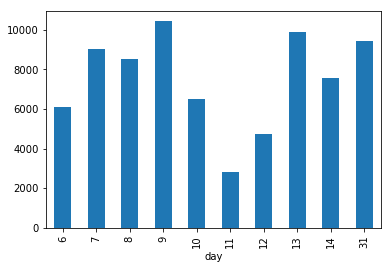

In [19]:
df["day"] = df["day"].astype("datetime64")
df["day"].groupby(df["day"].dt.day).count().plot(kind="bar")

2017 March, 11th and 12th are weekends, have the least number of counts

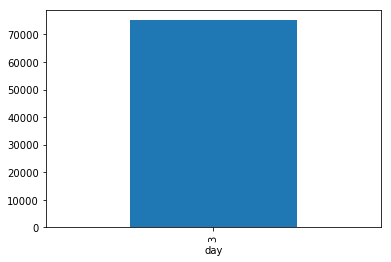

In [20]:
df["day"].groupby(df["day"].dt.month).count().plot(kind="bar")

- All the data collected on March 2017, and only distribute in 6th-14th and 31st
- 31st is a wrong data, should be eliminated from the dataset

In [21]:
df = df[df.day != "2017-03-31"]

Check missing data and propose possible missing data imputation

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65673 entries, 0 to 75090
Data columns (total 47 columns):
browser                65673 non-null object
browser_v              65673 non-null object
ch                     32335 non-null object
day                    65673 non-null datetime64[ns]
dist_id                65673 non-null object
event                  65673 non-null object
from_url               982 non-null object
ip                     65673 non-null object
isMsg                  469 non-null object
isSuccess              791 non-null object
is_fd                  65673 non-null object
is_ft                  65673 non-null object
latest_ch              8537 non-null object
latest_r               64862 non-null object
latest_rh              64862 non-null object
latest_utm_campaign    39903 non-null object
latest_utm_content     38763 non-null object
latest_utm_m           39691 non-null object
latest_utm_s           40583 non-null object
latest_utm_t           39095 non-nu

In [23]:
df.isnull().sum()

browser                    0
browser_v                  0
ch                     33338
day                        0
dist_id                    0
event                      0
from_url               64691
ip                         0
isMsg                  65204
isSuccess              64882
is_fd                      0
is_ft                      0
latest_ch              57136
latest_r                 811
latest_rh                811
latest_utm_campaign    25770
latest_utm_content     26910
latest_utm_m           25982
latest_utm_s           25090
latest_utm_t           26578
model                      0
name                   50503
nocache                    0
os                         0
os_version                 0
page                   53957
pageP                  49183
pageS                  48953
pageUrl                35317
refer_Host             33338
referrHostUrl          65204
referrer               33339
referrerUrl            65204
requestBtn             61402
result        

The rows with "profile_set_once" were exactly the mistake 31st dates that were deleted (9419 rows)
Features that have null value only at "profile_set_once" type: 
browser, browser_v, event, ip, is_fd, is_ft, model, os, os_version, screen_h, screen_w
if we consider event, all these features including time, dist_id might be useful

conversion rate (the percentage of users who take a desired action) analyses

In [24]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [25]:
df['dist_id'].describe()

count                                        65673
unique                                       11708
top       835cc4405ee7e42e5b401a25e65b4830b02af7d3
freq                                           254
Name: dist_id, dtype: object

In [26]:
df_dleave['dist_id'].describe()

count                                         3411
unique                                        1436
top       87091bab3fc571740f15ac4021efc4c7674776d5
freq                                            31
Name: dist_id, dtype: object

In [27]:
df_send['dist_id'].describe()

count                                          600
unique                                         501
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

In [28]:
df_verify['dist_id'].describe()

count                                          563
unique                                         472
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

In [29]:
df_verify['result'].describe()

count     563
unique      3
top        正确
freq      528
Name: result, dtype: object

In [30]:
df_verify['dist_id'][df_verify['result']=='正确'].describe()

count                                          528
unique                                         471
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

Only one user from 472 users has wrong verification code, and never has correct verification code

In [31]:
df_form['dist_id'].describe()

count                                          791
unique                                         497
top       04b0e0ed4def01a7a2881d3d8aa55c341a36cbbc
freq                                            17
Name: dist_id, dtype: object

In [32]:
df_submit['dist_id'].describe()

count                                          513
unique                                         461
top       1e31a9423d07802ba5fe38822ac548ae9c33a14d
freq                                            24
Name: dist_id, dtype: object

In [33]:
print("conversation rate of click send cellphone:")
print(501/11708)

conversation rate of click send cellphone:
0.04279125384352579


In [34]:
print("conversation rate of verify cellphone code:")
print(472/11708)

conversation rate of verify cellphone code:
0.040314314998291766


The conversation rate from verify cellphone code to form submit increase: it is not neccessary to send verification code for form submit

In [35]:
print("conversation rate of form submit:")
print(497/11708)

conversation rate of form submit:
0.04244960710625213


In [36]:
print("conversation rate of click submit:")
print(461/11708)

conversation rate of click submit:
0.0393747864707892


In [37]:
print("conversation rate of demo leave:")
print(1436/11708)

conversation rate of demo leave:
0.12265117868124359


The key factors that bottleneck the conversion rate is sign up/send celpphone verification

Pssible useful feature: session_r, session_rh, session_page_url, pageStayTime, pagePosition, pageUrl, latest_utm_s, latest_utm_s, latest_utm_t

In [38]:
df.session_p.value_counts(dropna=True)

https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                                                                                  16910
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_content=%E5%93%81%E7%89%8C%2D%E7%A5%9E%E7%AD%96&utm_campaign=%E5%93%81%E7%89%8C%E8%AF%8D                                                                                                                                                                          5419
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                                                                          

In [39]:
df.screen_r.value_counts(dropna=True)

https://www.baidu.com/baidu.php                                                                                                                                                                             24908
                                                                                                                                                                                                            16034
https://www.baidu.com/link                                                                                                                                                                                   4998
https://www.baidu.com/s                                                                                                                                                                                      1919
https://www.google.com.hk/                                                                                                                                      

In [40]:
df.screen_rh.value_counts(dropna=True)

www.baidu.com                             33510
                                          16028
www.sensorsdata.cn                         2047
www.sogou.com                              1743
m.baidu.com                                1467
36kr.com                                   1453
www.google.com.hk                           926
www.google.com                              817
www.so.com                                  578
sensorsdata.cn                              569
link.zhihu.com                              447
www.google.co.jp                            252
cn.bing.com                                 250
m.sogou.com                                 214
wap.sogou.com                               199
www.woshipm.com                             142
image.baidu.com                             117
class.sanjieke.cn                           112
www.itjuzi.com                              108
passport.36kr.com                            78
googleads.g.doubleclick.net             

session_page_url extract referrer data to session_r, and further clean the data to session_rh. 
We can see how the session_r/session_rh classify as empty

In [41]:
df['session_p'].loc[df['screen_r'] == '']

2                          https://sensorsdata.cn/?ch=demo
3                          https://sensorsdata.cn/?ch=demo
4                          https://sensorsdata.cn/?ch=demo
8                          https://sensorsdata.cn/?ch=demo
15                    https://www.sensorsdata.cn/demo.html
16                    https://www.sensorsdata.cn/demo.html
17                         https://sensorsdata.cn/?ch=demo
23                         https://sensorsdata.cn/?ch=demo
25                         https://sensorsdata.cn/?ch=demo
31                    https://www.sensorsdata.cn/demo.html
32                         https://sensorsdata.cn/?ch=demo
33                    https://www.sensorsdata.cn/demo.html
34                    https://www.sensorsdata.cn/demo.html
35                    https://www.sensorsdata.cn/demo.html
38                    https://www.sensorsdata.cn/demo.html
39                    https://www.sensorsdata.cn/demo.html
40                    https://www.sensorsdata.cn/demo.ht

most of empty session_r and session_rh are directly from sensordata website, a few have utm_s: baidu

In [42]:
df.latest_utm_s.value_counts(dropna=False)

baidu                 36085
NaN                   25090
sogou                  1943
sales4c                 441
wechat                  432
google                  393
admin                   374
sanjieke.cn             273
next.36kr.com            68
sunwenliang              65
mulumu.com               57
tianguang                56
liujinbo1                38
liuyaozhou               38
gaoxiaoqing              34
zhihu                    34
hao.caibaojian.com       33
sina                     31
admin10                  22
toutiao.io               20
analytics_test           15
shenyulong               15
guohongyao               11
demo                     11
linhuiyong               10
email                     9
yupan                     9
sunjiaqian                7
qiye.36kr.com             7
hzcaibin                  4
23h5                      4
zhoushunzhou              4
diaopeng                  4
gongxinrong               4
liquantao                 3
wangcheng           

latest_utm_s has 25090 empty, they come from sesordata website directly
considering the number, we can bin this feature as baidu and not baidu

In [43]:
df.latest_utm_m.value_counts(dropna=False)

cpc                   34623
NaN                   25982
mcpc                   3255
mfeed                   934
default                 538
answer                  133
banner                   67
hao.caibaojian.com       33
production               27
sidonghui                24
toutiao.io               20
referral                 15
youjian                   8
lixinya                   6
customer_m                5
sidashidai                2
edm                       1
Name: latest_utm_m, dtype: int64

In [44]:
df.latest_utm_t.value_counts(dropna=False)

NaN             26578
神策               7529
用户画像             5349
神策数据             3393
数据分析             1419
首页-通用词-三图-图1      934
大数据分析             813
用户分析              812
神策分析              677
电子商务数据            662
聚类分析              511
网站运营数据分析          506
网站数据统计            494
产品数据分析            489
用户画像分析            455
旅游大数据             411
app数据             406
数据分析系统            345
客户画像              310
app数据分析           293
用户行为              288
app分析             283
数据挖掘              279
数据可视化             250
日志分析系统            248
大数据应用             246
电商数据分析            243
数据分析公司            242
数据统计平台            231
数据分析平台            227
                ...  
数据分析工具有哪些           2
精益运营                2
数据驱动增长              2
神测数据                2
数据统计分析系统            2
国内数据可视化公司           2
网站用户行为分析            2
银行用户画像标签            2
数据分析法方法             2
白领用户画像              2
电商产品分析报告            2
数据收集分析系统            2
营运数据分析              2
国内大数据分析             2
电商大数据分析   

In [115]:
df.latest_utm_campaign.value_counts(dropna=False)

NaN                            25770
通用词                            22180
品牌词                            11929
S-通用词                           1917
神策-移动推广                          998
首页                               934
G-通用词                            391
用户行为                             285
caroline                         133
gamedemo                         133
vtrack                           118
ebizdemo                         109
test_fll_gxq_zgq                  73
financedemo                       72
spring                            68
xingshulin_standalone             65
golddemo                          60
凤巢头条                              57
数据分析                              44
trial                             34
jiedaibao-standalone              29
about                             27
皇冠子链                              26
李彦敏                               24
edudemo                           22
courses                           21
用户画像                              16
c

In [116]:
df.latest_utm_content.value_counts(dropna=False)

NaN                                                                          26910
品牌-神策                                                                        11678
通用-用户画像                                                                       5529
通用-数据分析                                                                       3136
通用-数据分析-产品                                                                    1403
通用-数据分析-行业                                                                    1242
通用-数据分析-运营                                                                    1042
通用-用户分析                                                                        983
通用词-三图                                                                         934
通用-APP运营                                                                       913
通用词-M                                                                          795
通用-电商运营                                                                        730
通用-用

In [45]:
df['source'] = (df.latest_utm_s == 'baidu') * 1

In [46]:
df.source.value_counts(dropna=True)

1    36085
0    29588
Name: source, dtype: int64

In [47]:
df['cpc'] = (df.latest_utm_m == 'cpc') * 1

In [48]:
#cost per click
df.cpc.value_counts(dropna=False)

1    34623
0    31050
Name: cpc, dtype: int64

In [49]:
df.pageUrl.value_counts(dropna=True)

https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                                                                                                     4377
https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                                              3857
https://www.sensorsdata.cn/index.html                                                                                                                                                                                                                                                                                    1832
https://www.sensorsdata.cn/product.html       

In [50]:
df.pageP.value_counts(dropna=False)

NaN     49183
 1.0    10679
 2.0     4032
 3.0      898
 4.0      881
Name: pageP, dtype: int64

In [51]:
df['event'].loc[df['pageP'] == 4.0].value_counts(dropna=False)

index_leave    881
Name: event, dtype: int64

PageUrl and PageP has the same information: which specific page interested

In [52]:
df.pageS.describe()

count    1.672000e+04
mean     6.681742e+03
std      5.343221e+04
min      3.300000e-02
25%      5.390750e+00
50%      2.057950e+01
75%      2.261860e+02
max      2.918014e+06
Name: pageS, dtype: float64

Total number of rows in btnclick: 13866; posible features with not too much null values.
latest_r                  78
latest_rh                 78
latest_utm_campaign     5227
latest_utm_content      5451
latest_utm_m            5263
latest_utm_s            5069
latest_utm_t            5383
page                    2150
pageUrl                    0
screen_h                   0
screen_r                   0
screen_rh                  0
screen_w                   0
session_p                  2

In [53]:
df_btnclick.latest_utm_s.value_counts()

baidu                 7921
sogou                  368
sales4c                 96
wechat                  78
admin                   71
google                  70
sanjieke.cn             69
sunwenliang             22
mulumu.com              18
tianguang               14
next.36kr.com           11
gaoxiaoqing             10
liuyaozhou               9
zhihu                    9
sina                     6
toutiao.io               5
hao.caibaojian.com       5
liujinbo1                4
admin10                  3
qiye.36kr.com            2
email                    2
shenyulong               2
yupan                    1
linhuiyong               1
Name: latest_utm_s, dtype: int64

In [54]:
df_btnclick.page.value_counts(dropna=False)

index            7964
demo             2242
NaN              2150
about             816
courses_index     694
Name: page, dtype: int64

In [55]:
df_btnclick.name.value_counts(dropna=False)

request     2967
demo        2783
document    2067
product     1942
b-round     1245
about        925
blog         803
viedo        550
logo         508
mail          76
Name: name, dtype: int64

btnclick has 2242 demo in page and 2783 demo in name, while demo leave has 3411 items

Total number of rows in page view: 32620

In [56]:
df_view.url.value_counts(dropna=True)

https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                                                                                                                3231
https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                                                         2810
https://www.sensorsdata.cn/product.html                                                                                                                                                                                                                                                                                             2118
https://www.s

In [57]:
df_view.url_path.value_counts(dropna=True)

/                                                                                                                                                                      12243
/demo.html                                                                                                                                                              4183
/manual/                                                                                                                                                                2634
/product.html                                                                                                                                                           2473
/b-round.html                                                                                                                                                           1907
/index.html                                                                                                                            

In [58]:
df_view.title.value_counts(dropna=True)

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     13700
神策分析|Sensors Analytics-帮你实现数据驱动－demo                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [59]:
df_view.ch.value_counts()[df_view['ch'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
image.baidu.com                              67
www.so.com                                   67
www.google.co.jp                             48
googleads.g.doubleclick.net                  41
ebizdemo.cloud.sensorsdata.cn                41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

In [60]:
df_view.refer_Host.value_counts()[df_view['refer_Host'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
image.baidu.com                              67
www.so.com                                   67
www.google.co.jp                             48
googleads.g.doubleclick.net                  41
ebizdemo.cloud.sensorsdata.cn                41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

refer_Host same as ch

In [61]:
df_view.screen_rh.value_counts()[df_view['screen_rh'].value_counts()>10]

www.baidu.com                             14770
                                           8361
www.sensorsdata.cn                         1054
m.baidu.com                                 994
36kr.com                                    790
www.sogou.com                               735
www.google.com.hk                           445
www.google.com                              372
sensorsdata.cn                              293
www.so.com                                  234
link.zhihu.com                              189
m.sogou.com                                 165
wap.sogou.com                               150
www.google.co.jp                            122
cn.bing.com                                 122
www.woshipm.com                              64
image.baidu.com                              61
class.sanjieke.cn                            50
www.itjuzi.com                               49
googleads.g.doubleclick.net                  43
wenku.baidu.com                         

Session referrer host similar to refer_Host and ch, but more null values
Same as the analysis on btnclick and page view, use latest_utm

- Analysis on the reason for demo leave
- Note that we can find utm_source on other data frame to see if we can find not null values

In [62]:
import geoip2.database

In [63]:
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-Country_20180206/GeoLite2-Country.mmdb')

In [64]:
# example usage of geoip2 
response = reader.country('219.135.131.99')

In [65]:
response.country.iso_code

'CN'

ip address has 8296 unrecognized value

In [66]:
# Define CN: user has ip address in China
#df['CN'] = df['ip'].apply(lambda row: reader.country(row).country.iso_code == 'CN')
CN=[]
for i in range(len(df['ip'])):
    try:
        CN.append ((reader.country(df.loc[i,'ip']).country.iso_code == 'CN') * 1)
    except:
        CN.append(0)

In [67]:
df['CN'] = CN

In [68]:
df.CN.value_counts(dropna=True)

1    56427
0     9246
Name: CN, dtype: int64

In [69]:
import geoip2.database
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-City_20180206/GeoLite2-City.mmdb')

In [70]:
CT=[]
for i in range(len(df['ip'])):
    try:
        CT.append (reader.city(df.loc[i,'ip']).city.name) 
    except:
        CT.append('0')

In [71]:
df['CT'] = CT

In [72]:
df['CT'].value_counts(dropna=False)

Beijing                21956
0                       8296
Shanghai                7205
Guangzhou               6669
Hangzhou                4411
Shenzhen                3775
Chengdu                 1972
Nanjing                 1811
Wuhan                   1200
NaN                     1035
Tianjin                  572
Hefei                    459
Shenyang                 368
Zhengzhou                331
Jinan                    287
Fuzhou                   277
Changsha                 271
Suzhou                   247
Wenzhou                  241
Chongqing                240
Xiamen                   239
Dongguan                 199
Hebei                    198
Shantou                  175
Xi'an                    168
Zhuhai                   160
Foshan                   144
Guiyang                  114
Ürümqi                   114
Nanning                  102
                       ...  
San Diego                  1
Cheung Sha Wan             1
Stony Brook                1
Dongyang      

In [73]:
df['weekend'] = ((df.day == '2017-03-11') | (df.day == '2017-03-12')) * 1

In [74]:
##define sign up column with users have form submit behavior
ind = df.dist_id.isin(df_form.dist_id) *1

In [75]:
df['signup'] = ind.tolist()

In [99]:
df_select = df.copy()

In [100]:
import numpy as np
df_select['freq'] = df_select.groupby('dist_id')['dist_id'].transform('count')

In [104]:
df_select.weekend.value_counts(dropna=True)

0    58085
1     7588
Name: weekend, dtype: int64

In [105]:
df_select.signup.value_counts(dropna=True)

0    53029
1    12644
Name: signup, dtype: int64

In [106]:
df_select['freq'].describe()

count    65673.000000
mean        25.265467
std         36.783402
min          1.000000
25%          5.000000
50%         13.000000
75%         30.000000
max        254.000000
Name: freq, dtype: float64

In [107]:
df_select.isnull().sum()

browser                    0
browser_v                  0
ch                     33338
day                        0
dist_id                    0
event                      0
from_url               64691
ip                         0
isMsg                  65204
isSuccess              64882
is_fd                      0
is_ft                      0
latest_ch              57136
latest_r                 811
latest_rh                811
latest_utm_campaign    25770
latest_utm_content     26910
latest_utm_m           25982
latest_utm_s           25090
latest_utm_t           26578
model                      0
name                   50503
nocache                    0
os                         0
os_version                 0
page                   53957
pageP                  49183
pageS                  48953
pageUrl                35317
refer_Host             33338
referrHostUrl          65204
referrer               33339
referrerUrl            65204
requestBtn             61402
result        

In [120]:
selected_columns = [u'dist_id',u'event',u'browser',u'browser_v',u'day', u'is_fd', 
                     u'is_ft', u'ip', u'latest_utm_s',u'latest_utm_m',u'model', u'os', u'os_version',
                     u'pageS', u'time', u'CN', u'CT',u'source', u'cpc',u'weekend',u'signup',u'freq']

In [121]:
cleaned_data_csv = 'data/cleaned_data.csv'
df_select[selected_columns].to_csv(cleaned_data_csv, index=False)

In [122]:
df_select[['dist_id','latest_utm_s']].tail(10)

,dist_id,latest_utm_s
75079,215110e7713ef7435524bf321fa894e411338c40,None
75080,215110e7713ef7435524bf321fa894e411338c40,None
75081,215110e7713ef7435524bf321fa894e411338c40,None
75082,215110e7713ef7435524bf321fa894e411338c40,None
75083,215110e7713ef7435524bf321fa894e411338c40,None
75084,215110e7713ef7435524bf321fa894e411338c40,None
75085,215110e7713ef7435524bf321fa894e411338c40,None
75086,215110e7713ef7435524bf321fa894e411338c40,None
75088,1b384ff8574084ef4a7356a8cd0c36350286e576,None
75090,3b23eacd700848ff085ec5877df695456bfe6bb3,baidu


Try to check if we can use the first time source for anlysis, seems to be the same